# ETRA Challenge Report

## Introduction

In ETRA Challenge, 8 subjects were tested on various tasks including visual fixation, visual search and visual exploration. 
Multiple stimuli were presented, such as, natural images, blank scenes or images from "Where is Waldo" book.
We came up with two, which we want to test:

1. There will be difference in eye movement trajectories between variants `Fixation` and `FreeViewing` in the task type `Blank`.
2. There will be difference in pupil size based on the task and it will also depend on the time elapsed since the start of the experiment.


## Data Format

The dataset is downloaded into directory `data/` which contains:

* `data/` - Directory containing subdirectories with data of each participant stored in CSV files reprezenting each trial. Each file contains 45 seconds of eye tracker data.
* `images/` - Contains the pictures shown during the experiment.
* `DataSummary.csv` - Each row in the file contains info about the clicks of the given participant during the trial. 

Description of the dataset is on the page [ETRA dataset description](https://etra.acm.org/2019/challenge.html).

# Setup

Following part sets up the enviroment to properly run the experiment.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()

In [2]:
# @formatter:off
%matplotlib inline
# should enable plotting without explicit call .show()

%load_ext pretty_jupyter
#@formatter:on

In [3]:
# Load the dataset using the prepared module `etra.py`.

from etra import ETRA

dataset = ETRA()

Dataset etra already downloaded.
Unpacking etra...


## Load Data

Following part defines function which easily loads specified data from the dataset based on the `subject`, `fv_fixation` and `task_type` parameters.

In [4]:
from etra import read_data

def load_data(
        subject="*",
        fv_fixation="*",
        task_type="*",
    ):
    """
    Loads selected data and sorts them by the time.
    """
    
    selected_files = (dataset.data_dir / "data").glob(f"{subject}/*_{fv_fixation}_{task_type}_*.csv")

    return pd.concat((read_data(f) for f in selected_files)).sort_values(by="Time")

### Examples: 

In [5]:
# Load participant `009`, `Fixation` task and type `Waldo`.
df_009_fix_waldo = load_data(
        subject="009",
        fv_fixation="Fixation",
        task_type="Waldo",
    )

In [6]:
df_009_fix_waldo.head()

,participant_id,trial_id,fv_fixation,task_type,stimulus_id,Time,LXpix,LYpix,RXpix,RYpix,LXhref,LYhref,RXhref,RYhref,LP,RP
0,009,016,Fixation,Waldo,wal014,1614108,473.22,317.625,468.18,314.700,-802.0,2960.0,-858.0,2931.0,722,903
1,009,016,Fixation,Waldo,wal014,1614110,473.30,317.775,467.78,314.775,-801.0,2962.0,-862.0,2932.0,720,904
2,009,016,Fixation,Waldo,wal014,1614112,473.38,317.925,467.46,314.925,-800.0,2963.0,-866.0,2934.0,718,905
3,009,016,Fixation,Waldo,wal014,1614114,473.30,319.125,465.14,315.750,-800.0,2977.0,-889.0,2945.0,720,910
4,009,016,Fixation,Waldo,wal014,1614116,474.82,317.550,465.46,316.800,-785.0,2958.0,-886.0,2957.0,723,908


In [7]:
# Load `Waldo` data from all the participants and both `Fixation` and `FreeViewing`.
df_waldo = load_data(        
        task_type="Waldo",
    )

In [8]:
df_waldo.head()

,participant_id,trial_id,fv_fixation,task_type,stimulus_id,Time,LXpix,LYpix,RXpix,RYpix,LXhref,LYhref,RXhref,RYhref,LP,RP
0,062,001,Fixation,Waldo,wal002,262296,461.70,297.375,467.62,299.550,-1418.0,3197.0,-1353.0,3218.0,744,962
1,062,001,Fixation,Waldo,wal002,262298,462.58,298.875,469.06,300.825,-1425.0,3197.0,-1354.0,3216.0,744,963
2,062,001,Fixation,Waldo,wal002,262300,463.22,298.650,468.98,301.125,-1418.0,3194.0,-1355.0,3220.0,746,961
3,062,001,Fixation,Waldo,wal002,262302,463.22,299.400,469.46,301.050,-1418.0,3203.0,-1350.0,3219.0,747,961
4,062,001,Fixation,Waldo,wal002,262304,462.58,299.250,469.30,302.025,-1425.0,3201.0,-1352.0,3230.0,747,962


# Hypotheses

Following part describes the hypotheses and its testing.

## Hypothesis 1: 
### "There will be difference in eye movement trajectories between variants `Fixation` and `FreeViewing` in the task type `Blank`."

During the task `Fixation` participants must keep their focus on the fixed point of the screen. 
On the other hand during `FreeViewing` task they are able to move their eyes in any direction. 
We expect that the trajectory of the eye movement will differ in the puzzle task types (`Puzzle` and `Waldo`), 
because it would be imposible to solve the puzzle without moving the eyes (for `FreeViewing` part).
We also expect that the participant would discover the picture in the task type `Natural` and the trajectories would differ too.

The interesting example could be the task type `Blank`. In this task there is nothing in the picture just blank picture.
The participant during the `FreeViewing` task could either stare on the fixed point of the picture which would lead 
to same trajectories as in the `Fixation` tasks or randomly fluctuate their focus on the picture.
This idea is the main motivation to test the hypothesis above.


(Note: The original hypothesis was that the trajectories would differ in the tasks `Puzzle` and `Waldo`. 
However, the hypothesis was based on the wrong understanding of the task `Fixation` for the types `Puzzle` and `Waldo` 
and it does not make much sense to test this hypothesis now (it would almost certaily lead into the difference of the trajectories.
This is the reason why we decided to change to hypothesis to the one described above.)

### Data Preparation

For this experiment, we choose only the data of the task type `Blank` from the arbitrary choosen participant `009`. Then we extracted and the information about the
time, the parameter `fv_fixation`, ID of the trial and the coordinates of the left eye focus (`LXpix`, `LYpix`), renamed the parameter
names for the convenient usage and normalized the time.

We have choosen only one participant, because of the selected statistical tests which assume independent variables. That condition will not be fulfilled for the multiple participants. 

In [38]:
hyp1_var = load_data(subject="009", task_type="Blank")

In [39]:
hyp1_var.head()

,participant_id,trial_id,fv_fixation,task_type,stimulus_id,Time,LXpix,LYpix,RXpix,RYpix,LXhref,LYhref,RXhref,RYhref,LP,RP
0,009,004,FreeViewing,Blank,grey,524232,533.22,245.775,523.70,235.050,566.0,521.0,454.0,413.0,823,964
1,009,004,FreeViewing,Blank,grey,524234,533.94,246.300,523.38,233.925,573.0,525.0,449.0,401.0,820,973
2,009,004,FreeViewing,Blank,grey,524236,531.94,247.200,521.78,233.475,553.0,538.0,432.0,398.0,823,964
3,009,004,FreeViewing,Blank,grey,524238,533.30,246.600,523.38,238.650,566.0,530.0,454.0,452.0,824,977
4,009,004,FreeViewing,Blank,grey,524240,532.02,247.575,524.34,238.725,554.0,542.0,464.0,452.0,823,977


In [40]:
# Rename the parameters for the future usage.
hyp1_var = hyp1_var\
    .rename(
        {
            "Time": "time",
            "fv_fixation" : "fv_fixation",
            "trial_id": "trial",
            "LXpix": "x", 
            "LYpix": "y",
        },
        axis = 1
    )

# Drop the redundant parameters.
hyp1_var = hyp1_var\
    [
        [
            "time",
            "trial",
            "fv_fixation",
            "x",
            "y",
        ]
    ]

# Time normalization (to start from 0).
hyp1_var["time"] = hyp1_var.groupby(["trial"])["time"].transform(lambda x: x - x.min())

In order to compare the trajectories we 

In [9]:
def create_interval_means(
        data : pd.DataFrame,
        x_col="x",
        y_col="y",
        interval_size=40,
    ):
    """
    Creates new table of means for intervals of the size `interval_size`.
    """
    
    num_rows = data.shape[0]

    datas = []

    for start_point in range(0, num_rows, interval_size):
        slice_data = data.loc[start_point:min(start_point + interval_size, num_rows - 1), ("x", "y")]
        if not slice_data.empty:
            interval_means = slice_data.mean()
            datas.append(interval_means)
    
    return pd.DataFrame(datas)

In [10]:
def compute_distance(
        data : pd.DataFrame,
        x_col="x",
        y_col="y",
        dist_name="distance",
    ):

    # Compute distance between consecutive pairs of points
    data[dist_name] = np.sqrt((data[x_col] - data[x_col].shift())**2 + (data[y_col] - data[y_col].shift())**2)

    # Remove the first row, which has a NaN value for distance
    return data.dropna()

In [26]:
hyp1_var_avg_x_y = hyp1_var\
    .groupby(["trial", "fv_fixation"])\
    .apply(create_interval_means)\
    .reset_index()\
    # .rename(columns={"level_2": "time"})

In [28]:
hyp1_var_avg_x_y

,trial,fv_fixation,level_2,x,y
0,004,FreeViewing,0,532.423902,246.609146
1,004,FreeViewing,1,533.850244,245.286585
2,004,FreeViewing,2,531.584878,245.006707
3,004,FreeViewing,3,497.715610,277.293293
4,004,FreeViewing,4,469.668780,301.732317
...,...,...,...,...,...
16885,120,Fixation,558,465.198537,314.454878
16886,120,Fixation,559,463.992683,314.912195
16887,120,Fixation,560,464.578049,314.921341
16888,120,Fixation,561,464.642439,316.033537


In [30]:
hyp1_var_avg_x_y = hyp1_var_avg_x_y\
    .groupby(["trial", "fv_fixation"])\
    .apply(compute_distance)\
    .reset_index(drop=True)\
    .groupby(["trial", "fv_fixation"])\
    .agg(avg_distance=("distance", np.mean))\
    .reset_index()\
    .drop("trial", axis=1)

In [32]:
hyp1_var_avg_x_y.head()

,fv_fixation,avg_distance
0,FreeViewing,18.779589
1,Fixation,2.152027
2,FreeViewing,26.410330
3,Fixation,3.568943
4,FreeViewing,34.340202


In [33]:
hyp1_var_avg_x_y.groupby("fv_fixation").describe().round(decimals=2)

avg_distance                                                
                   count   mean   std    min    25%    50%    75%    max
fv_fixation                                                             
Fixation            15.0   3.80  1.63   2.15   2.60   3.05   5.10   6.62
FreeViewing         15.0  19.21  7.52  10.15  12.68  17.77  24.62  34.34

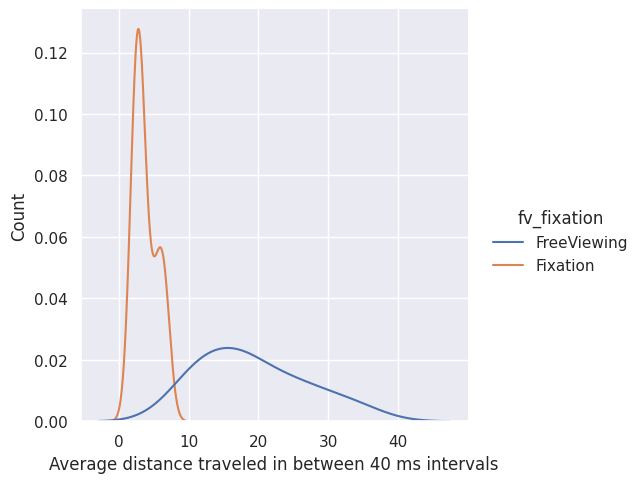

In [34]:
g = sns.displot(
    data=hyp1_var_avg_x_y,#[hyp1_var_avg_x_y.fv_fixation == "FreeViewing"],
    x='avg_distance',
    hue='fv_fixation',
    # col="task",
    kind="kde",
    # kde=True,

    )
g.set_xlabels("Average distance traveled in between 40 ms intervals")
g.set_ylabels("Count")

In [35]:
ttest_result = stats.ttest_rel(
    hyp1_var_avg_x_y[(hyp1_var_avg_x_y.fv_fixation == "FreeViewing")].avg_distance,
    hyp1_var_avg_x_y[(hyp1_var_avg_x_y.fv_fixation == "Fixation")].avg_distance,
)

wilcoxon_result = stats.ranksums(
    hyp1_var_avg_x_y[(hyp1_var_avg_x_y.fv_fixation == "FreeViewing")].avg_distance,
    hyp1_var_avg_x_y[(hyp1_var_avg_x_y.fv_fixation == "Fixation")].avg_distance,
)

print(ttest_result)
print(wilcoxon_result)

Ttest_relResult(statistic=7.271282199491521, pvalue=4.086946700927297e-06)
RanksumsResult(statistic=4.666282626286914, pvalue=3.0669777654622667e-06)


In [36]:
# for task in ["Puzzle", "Waldo"]:
#     ttest_result = stats.ttest_rel(
#         hyp1_var_avg_x_y[(hyp1_var_avg_x_y.fv_fixation == "FreeViewing") & (hyp1_var_avg_x_y.task == task)].avg_distance,
#         hyp1_var_avg_x_y[(hyp1_var_avg_x_y.fv_fixation == "Fixation") & (hyp1_var_avg_x_y.task == task)].avg_distance,
#     )
    
#     wilcoxon_result = stats.ranksums(
#         hyp1_var_avg_x_y[(hyp1_var_avg_x_y.fv_fixation == "FreeViewing") & (hyp1_var_avg_x_y.task == task)].avg_distance,
#         hyp1_var_avg_x_y[(hyp1_var_avg_x_y.fv_fixation == "Fixation") & (hyp1_var_avg_x_y.task == task)].avg_distance,
#     )
    
#     print(ttest_result)
#     print(wilcoxon_result)

### Hypotéza 2:
"Pupil size" se bude lišit v závislosti na variantě úlohy a  době pozorování jednotlivých obrázků ("Blank", "Natural", "Puzzle", "Waldo).

### Hypotheses to test:

Null hypothese: Pupil size is the same for the fixed scene X and arbitraty choosen other scene Y.
Alternative hypothese: Pupil size is different for the fixed scene X and arbitrary choosen other scene Y.

We have choosen scene "Blank" as a fixed scene X and rest of the scenes as Y to check.

Nejprve musíme umět odstranit mrknutí, 
které způsobují problémy především při testování hypotézy 2.

In [ ]:
def remove_blinks(
        data : pd.DataFrame,
        pupil_column='lp',
        blink_treshold=100,
        blink_duration=40,
    ):
    """
    Removes all blink candidates from the dataset.
    
    Arguments:
        TODO:
    """
    
    new_data = data.copy()
    num_rows = new_data.shape[0]
    
    # Find all time candidates for the blink (lower than `blink_treshold`).
    blink_peaks = np.where(new_data[pupil_column].lt(blink_treshold))[0]
    for peak in blink_peaks:
        # For each blink candidate get rid of the times around the blink
        # (to eliminate whole blinking interval).
        new_data\
            .loc[
                max(0, peak - blink_duration):
                    min(peak + blink_duration, num_rows),
                pupil_column
            ] = pd.NA
    
    return new_data.dropna()

In [ ]:
# We choose only subject '009' because we want to use t-test.
hyp2_var = load_data(subject="009", fv_fixation="FreeViewing", task_type="*")

hyp2_var = hyp2_var.rename(
        {
            "Time": "time",
            # "participant_id": "participant",
            "trial_id": "trial",
            "task_type": "task",
            "LP": "lp",
        },
        axis = 1
    )

# Get only necessary parameters. Choose only right pupil.
hyp2_var = hyp2_var\
    [
        [
            "time",
            # "participant",
            "trial",
            "task",
            "lp",
        ]
    ]

# Normalize time to always start from the 0.
# hyp2_var["time"] = hyp2_var\
#     .groupby(["participant", "trial"])["time"]\
#     .transform(lambda x: x - x.min())

hyp2_var["time"] = hyp2_var\
    .groupby("trial")["time"]\
    .transform(lambda x: x - x.min())

In [ ]:
hyp2_var.head()

In [ ]:
def plot_blinks(
        data: pd.DataFrame,
        trial_id,
    ):
    before = data[data.trial == trial_id].assign(blinks_removed='No')
    after = remove_blinks(before).assign(blinks_removed='Yes')
    hlp = pd.concat([before, after])

    g = sns.relplot(
        data=hlp, 
        x='time', y='lp',
        kind='line',
        row='blinks_removed',
        aspect=3
    )
    g.set_xlabels("Time (ms)")
    g.set_ylabels("Pupil size")
    g.axes[0, 0].set_title(f"Pupil size as measured :trial {trial_id}")
    g.axes[1, 0].set_title("Pupil size with blinks removed :trial {trial_id}");

In [ ]:
plot_blinks(hyp2_var, "009")

In [ ]:
plot_blinks(hyp2_var, "106")

In [ ]:
plot_blinks(hyp2_var, "058")

In [ ]:
before = hyp2_var[hyp2_var.trial == '006'].assign(blinks_removed='No')
after = remove_blinks(before).assign(blinks_removed='Yes')
hlp = pd.concat([before, after])

g = sns.relplot(
    data=hlp, 
    x='time', y='lp',
    kind='line',
    row='blinks_removed',
    aspect=3
)
g.set_xlabels("Time (ms)")
g.set_ylabels("Pupil size")
g.axes[0, 0].set_title("Pupil size as measured"plot_blinks)
g.axes[1, 0].set_title("Pupil size with blinks removed");

In [ ]:
# hyp2_var_avg_pupil = hyp2_var\
#     .groupby(["participant", "trial"])\
#     .apply(remove_blinks)\
#     .reset_index(drop=True)\
#     .groupby(["participant", "trial", "task"])\
#     .agg(avg_rp=("rp", np.mean))\
#     .reset_index()\
#     .drop("trial", axis=1)
hyp2_var_avg_pupil = hyp2_var\
    .groupby("trial")\
    .apply(remove_blinks)\
    .reset_index(drop=True)\
    .groupby(["trial", "task"])\
    .agg(avg_lp=("lp", np.mean))\
    .reset_index()\
    .drop("trial", axis=1)

In [ ]:
hyp2_var

In [ ]:
hyp2_var_avg_pupil.head()

In [ ]:
hyp2_var_avg_pupil.groupby("task").describe().round(decimals=2)

In [ ]:
g = sns.displot(
    data=hyp2_var_avg_pupil,
    x='avg_lp',
    hue='task',
    col="task",
    kde=True,
    )
g.set_xlabels("Average left pupil size")
g.set_ylabels("Count")

In [ ]:
hyp2_var_avg_pupil.head()

In [ ]:
for alt_task in ["Natural", "Puzzle", "Waldo"]:
    ttest_result = stats.ttest_rel(
        hyp2_var_avg_pupil[hyp2_var_avg_pupil.task == "Blank"].avg_lp,
        hyp2_var_avg_pupil[hyp2_var_avg_pupil.task == alt_task].avg_lp,
    )
    
    wilcoxon_result = stats.ranksums(hyp2_var_avg_pupil[hyp2_var_avg_pupil.task == "Blank"].avg_lp,
        hyp2_var_avg_pupil[hyp2_var_avg_pupil.task == alt_task].avg_lp
        )
    
    print(ttest_result)
    print(wilcoxon_result)

## Data manipulation

This is an optional section, in which you could describe, what did you do with the data to obtain given format. In our example, we just need to merge the data. Additionally, we want to detect fixations

In [ ]:
from etra import detect

df_hyp1_samples = pd.concat([df_fix_puzzle, df_fix_waldo]).rename(
    {"Time": "time", "trial_id": "trial", "LXpix": "x", "LYpix": "y"}, axis=1)
df_hyp1_samples["time"] = df_hyp1_samples.groupby(["participant_id", "trial"])["time"].transform(lambda x: x - x.min())

df_hyp1_fix = []
groups = df_hyp1_samples.groupby(["participant_id", "trial"])
for (pid, trial), group in groups:
    tmp = detect(group)
    tmp = tmp[tmp["label"] == "FIXA"]
    tmp["participant_id"] = pid
    tmp["trial"] = trial
    df_hyp1_fix.append(tmp)

df_hyp1_fix = pd.concat(df_hyp1_fix)
df_hyp1_fix = df_hyp1_samples[
    ["participant_id", "trial", "fv_fixation", "task_type", "stimulus_id"]].drop_duplicates().merge(df_hyp1_fix, on=[
    "participant_id", "trial"], how="left")

In [ ]:
df_hyp1_fix.head()

## Results

In this section, describe statistical test that you used for testing your hypotheses. In general, the selection of statistical test depends on the type of variable.

There are following types of variables:

* Continuous - when the variable behaves as number. All fixation durations, pupil size, time are continuous variables
* Ordinal - variables do not behave as numbers, but you can order them. Grades in school are typical example. You can't say how many times is 1 better than 2, but you can say that 1 is better grade than 2. There are no nominal variables in this dataset, so I added this description only for completeness.
* Nominal - when variables are qualitative different. Type of task is an example of nominal variable

In the case of two variables, there are following options
* both variables continuous - regression or correlation (in R function `lm()` or `cor`/`cor.test` )
* both variables nominal - contingency tables a chi square test
* one variable nominal, other continuous - this is very common, this type is used, when we compare differences two condition - in this case, we use t.tests

There are three main types of t.tests

* Independent t-test - both groups contain independent data points (each data point is a different entity)
* Paired t-test - data points are linked to each other. This is typical example, when we measure same subjects multiple times
* One sample t-test - we are testing the sample against some theoretically interesting number

In case of more than two variables, we need to use ANOVAs. Usually, one variable will be dependent (outcome, the one which levels interest us) and others will be independent (predictors, the one, that we manipulate).
* For more than two groups, we use between-subject ANOVA
* For more than two measurement of same subject, we use within-subject ANOVA
* We can combine multiple between- and within-subject factors into mixed ANOVA

In our case, the simplest way how to test that is to aggregate data per each trial and use t-tests

### using t-tests

Because we have multiple data points from each participant, we can first aggregate data for each trial

In [ ]:
avg_durations = df_hyp1_fix.assign(dur=lambda x: x.end_time - x.start_time)\
    .groupby(["task_type", "trial"])\
    .agg(avg_dur=("dur", "mean"))\
    .reset_index()
avg_durations

In [ ]:
ttest_result = stats.ttest_rel(
    avg_durations[avg_durations.task_type == "Puzzle"].avg_dur,
    avg_durations[avg_durations.task_type == "Waldo"].avg_dur,
)

In [ ]:
%%jinja markdown

Results show that there is no difference between Fixation duration in Where is Waldo and Puzzle (pvalue={{"{:.3}".format(ttest_result.pvalue)}})